In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from cv2 import resize

In [9]:
# permeability map
perm = np.moveaxis(np.loadtxt('Heterogeneous_1a_higherK/perm_base.txt').reshape(10,51,51,3)[...,0], 0, -1)[...,0]
logpermx = np.log10(perm * 1.01325e15)
print('perm: {} | logpermx: {}'.format(perm.shape, logpermx.shape))

perm: (51, 51) | logpermx: (51, 51)


C:\Users\Misael Morales\AppData\Local\Temp\ipykernel_30548\3739625908.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_yticklabels(np.arange(0.75,10,0.25), fontsize=12, weight='bold')


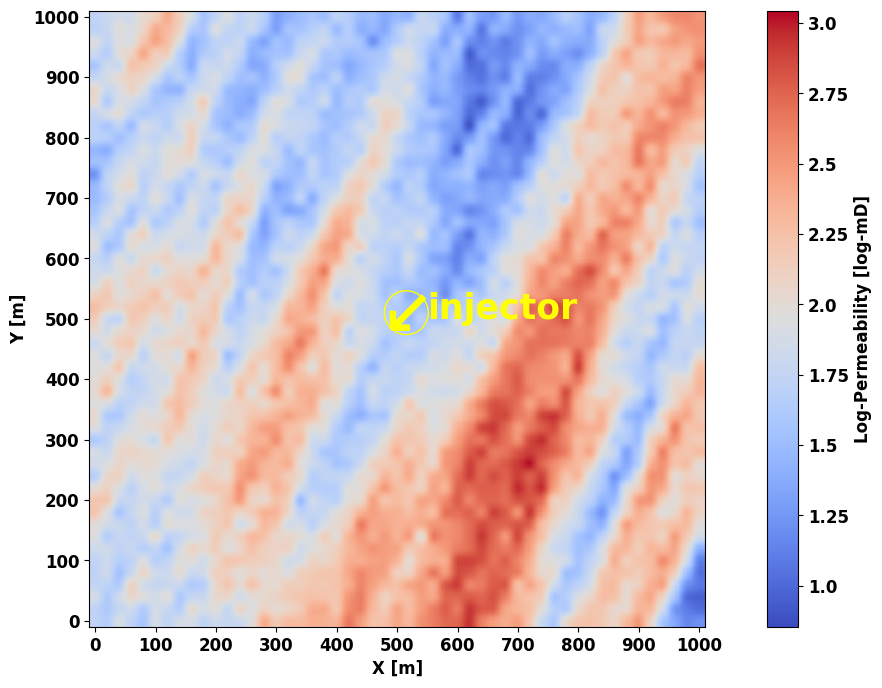

In [55]:
plt.figure(figsize=(20,8))

# permeability map
im = plt.imshow(logpermx, cmap='coolwarm', interpolation='hamming')

# injection well
plt.scatter(25.5, 25.5, c='yellow', s=1000, marker='$\swarrow$')
plt.scatter(25.75, 25.5, s=1000, marker='o', edgecolors='yellow', facecolors='none')
plt.text(27.5, 25, 'injector', c='yellow', size=25, weight='bold')  

# plot attributes
cb = plt.colorbar(im, fraction=0.046, pad=0.04)
cb.set_label('Log-Permeability [log-mD]', weight='bold', fontsize=12)
cb.ax.set_yticklabels(np.arange(0.75,10,0.25), fontsize=12, weight='bold')

plt.xticks(np.linspace(0,50,11,dtype='int'), labels=np.linspace(0,1000,11,dtype='int'),  fontsize=12, weight='bold')
plt.yticks(np.linspace(0,50,11,dtype='int'), labels=np.linspace(0,1000,11,dtype='int'), fontsize=12, weight='bold')
plt.gca().invert_yaxis()

plt.xlabel('X [m]', fontsize=12, weight='bold'); plt.ylabel('Y [m]', fontsize=12, weight='bold')
plt.show()

In [41]:
mydir1 = 'C:/Users/381792/Documents/CO2-Monitor-Optim/Heterogeneous_1a_higherK/_misael_results/well_placement_results.npy'
mydir2 = 'C:/Users/381792/Documents/CO2-Monitor-Optim/Heterogeneous_2a_higherK/_misael_results/optimization_by_column.csv'

mydir1 = 'E:/CO2-Monitor-Optim/Heterogeneous_1a_higherK/_misael_results/well_placement_results.npy'
mydir2 = 'E:/CO2-Monitor-Optim/Heterogeneous_2a_higherK/_misael_results/optimization_by_column.csv'

measures = ['presWAT','co2sl','temp']

# Heterogeneous 1a higher K - (3 leaky wells)
data1 = np.load(mydir1)
data1 = np.array(pd.DataFrame(data1, columns=measures)).reshape(4,4,3)
print('1a:', data1.shape)
temp = np.zeros((31,51,51)).flatten()
temp[[26531, 26551, 27561]] = 1E10
temp2 = np.flip(np.rot90(temp.reshape(31,51,51).T,3),1)
ws1 = np.rot90(np.array(np.where(temp2[...,10]>100)),3)

# Heterogeneous 2a higher K - (6 leaky wells)
data2 = pd.read_csv(mydir2)
data2 = np.array(data2[measures]).reshape(4,4,3)
print('2a:', data2.shape)
temp = np.zeros((31,51,51)).flatten()
temp[[26551, 27561, 27581, 28091, 26031, 26531]] = 1E10
temp2 = np.flip(np.rot90(temp.reshape(31,51,51).T,3),1)
ws2 = np.rot90(np.array(np.where(temp2[...,10]>100)),3)

data1[2,1,1] = -20
data2[2,1,1] = -21.5

# append
data = [data1, data2]
ws = [ws1, ws2]

1a: (4, 4, 3)
2a: (4, 4, 3)


C:\Users\Misael Morales\AppData\Local\Temp\ipykernel_30548\3911449708.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_yticklabels(np.arange(0.75,10,0.25), fontsize=12, weight='bold')


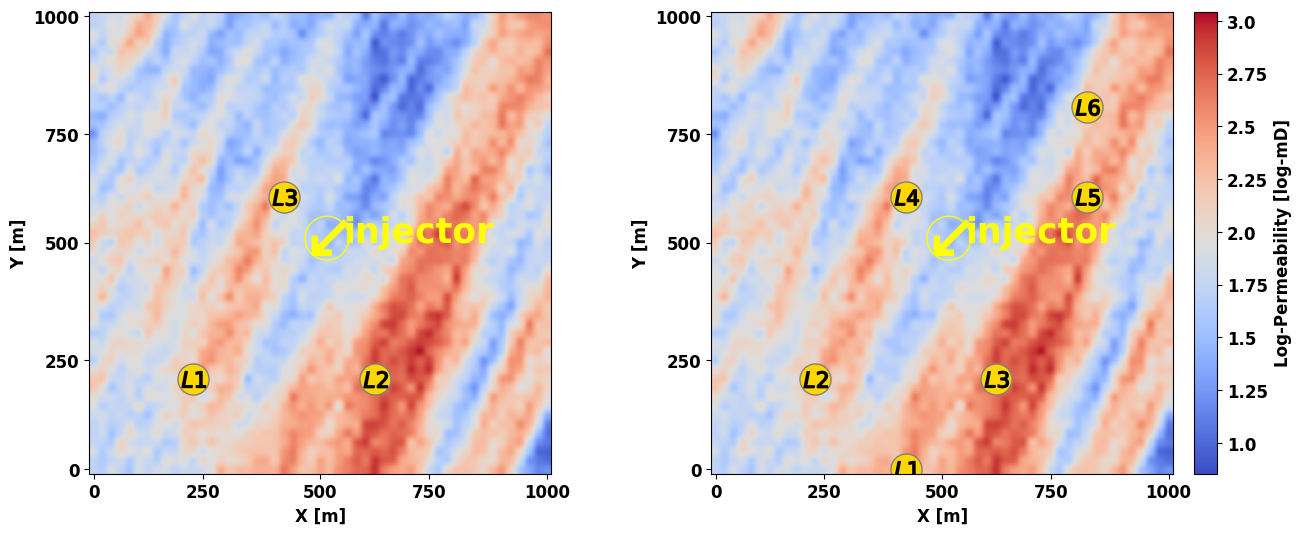

In [65]:
plt.figure(figsize=(15,6))

plt.subplot(121)
im = plt.imshow(logpermx, cmap='coolwarm', interpolation='hamming')
plt.scatter(25.5, 25.5, c='yellow', s=1000, marker='$\swarrow$')
plt.scatter(25.75, 25.5, s=1000, marker='o', edgecolors='yellow', facecolors='none')
plt.text(27.5, 25, 'injector', c='yellow', size=25, weight='bold')  
plt.xticks(np.linspace(0,50,5,dtype='int'), labels=np.linspace(0,1000,5,dtype='int'),  fontsize=12, weight='bold')
plt.yticks(np.linspace(0,50,5,dtype='int'), labels=np.linspace(0,1000,5,dtype='int'), fontsize=12, weight='bold')
plt.gca().invert_yaxis()
plt.xlabel('X [m]', fontsize=12, weight='bold'); plt.ylabel('Y [m]', fontsize=12, weight='bold')
for k in range(len(ws1)):
    plt.scatter(ws1[k,0], ws1[k,1], c='gold', s=500, edgecolors='gray')
    plt.scatter(ws1[k,0], ws1[k,1], c='k', marker='$L{}$'.format(k+1), s=300)

plt.subplot(122)
im = plt.imshow(logpermx, cmap='coolwarm', interpolation='hamming')
plt.scatter(25.5, 25.5, c='yellow', s=1000, marker='$\swarrow$')
plt.scatter(25.75, 25.5, s=1000, marker='o', edgecolors='yellow', facecolors='none')
plt.text(27.5, 25, 'injector', c='yellow', size=25, weight='bold')  
cb = plt.colorbar(im, fraction=0.046, pad=0.04)
cb.set_label('Log-Permeability [log-mD]', weight='bold', fontsize=12)
cb.ax.set_yticklabels(np.arange(0.75,10,0.25), fontsize=12, weight='bold')
plt.xticks(np.linspace(0,50,5,dtype='int'), labels=np.linspace(0,1000,5,dtype='int'),  fontsize=12, weight='bold')
plt.yticks(np.linspace(0,50,5,dtype='int'), labels=np.linspace(0,1000,5,dtype='int'), fontsize=12, weight='bold')
plt.gca().invert_yaxis()
plt.xlabel('X [m]', fontsize=12, weight='bold'); plt.ylabel('Y [m]', fontsize=12, weight='bold')
for k in range(len(ws2)):
    plt.scatter(ws2[k,0], ws2[k,1], c='gold', s=500, edgecolors='gray')
    plt.scatter(ws2[k,0], ws2[k,1], c='k', marker='$L{}$'.format(k+1), s=300)

plt.show()

In [42]:
def plot_final(data, ws, perm, labels, titles, cmaps, supertitle, figsize=(14,8), interp=['hanning'], alpha=0.5, fontsize=16, smooth=False, save=False, injcolor='yellow'):
    def make_ticks(im, ax):
        x_extent, y_extent = im.get_extent()[0:2], im.get_extent()[2:4]
        ax.set_xticks(np.linspace(x_extent[0], x_extent[1], num=5)); ax.set_xticklabels(np.linspace(0, 50, 5))
        ax.set_yticks(np.linspace(y_extent[0], y_extent[1], num=5)); ax.set_yticklabels(np.linspace(0, 50, 5)[::-1])
        ax.grid(True, color='k', linestyle='dotted')       
    ws1, ws2 = ws
    fig, axs = plt.subplots(2, 3, figsize=figsize, facecolor='white')
    for i in range(2):
        axs[i,0].set_ylabel(labels[i], fontsize=fontsize)
        for j in range(3):
            d = np.rot90(np.flip(np.rot90(data[i][...,j], 1)),3)
            im0 = axs[i,j].imshow(perm, cmap=cmaps[0], interpolation=interp[0])
            if smooth:
                im1 = axs[i,j].imshow(resize(d, perm.shape), cmap=cmaps[1], alpha=alpha, vmin=-30, vmax=0, aspect='equal', interpolation='gaussian')
            else:
                im1 = axs[i,j].imshow(d, cmap=cmaps[1], alpha=alpha, vmin=-30, vmax=0, aspect='equal', extent=im0.get_extent())
            make_ticks(im1, axs[i,j]) 
            plt.colorbar(im1, ax=axs[i,j], pad=0.04, fraction=0.046)
            # injection well
            axs[i,j].scatter(25.5, 25.5, c=injcolor, s=500, marker='$\swarrow$')
            axs[i,j].scatter(25.75, 25.5, s=500, marker='o', edgecolors=injcolor, facecolors='none')
            axs[i,j].text(27.5, 25, 'injector', c=injcolor, size=15, weight='bold')
            w=ws1 if i==0 else ws2
            for k in range(len(w)):
                axs[i,j].scatter(w[k,0], w[k,1], c='gold', s=300, edgecolors='gray')
                axs[i,j].scatter(w[k,0], w[k,1], c='k', marker='$L{}$'.format(k+1), s=100)
            # params
            axs[i,j].invert_yaxis()
            axs[0,j].set_title(titles[j], fontsize=fontsize)
    plt.suptitle(supertitle, fontsize=1.5*fontsize)
    plt.tight_layout()
    if save:
        plt.savefig('figures/{}.png'.format(supertitle))
    plt.show()

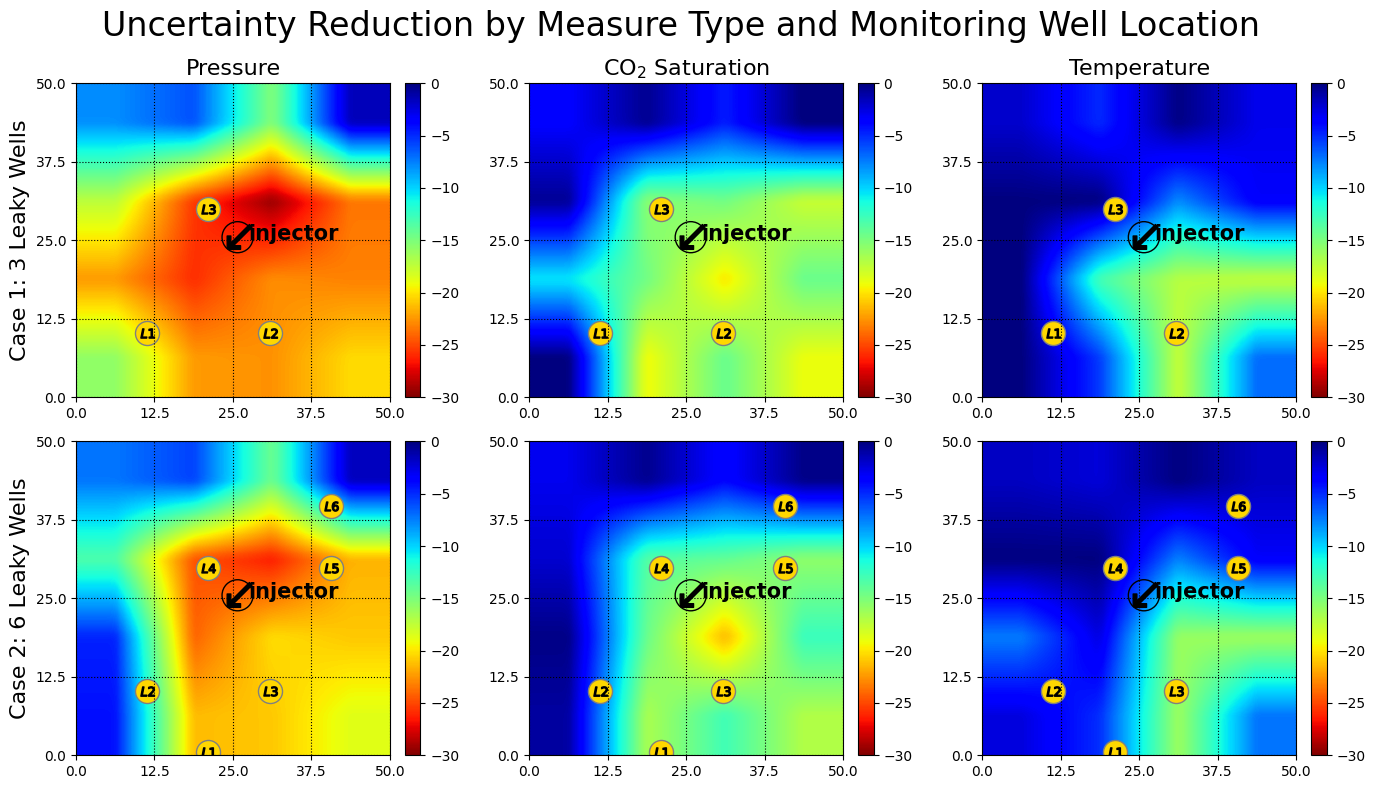

In [43]:
labels = ['Case 1: 3 Leaky Wells', 'Case 2: 6 Leaky Wells']
titles = ['Pressure', 'CO$_2$ Saturation', 'Temperature']
cmaps  = ['coolwarm', 'jet_r']   #plt.cm.get_cmap('jet_r', 10)
supertitle = 'Uncertainty Reduction by Measure Type and Monitoring Well Location'

plot_final(data, ws, logpermx, labels, titles, cmaps, supertitle, smooth=True, alpha=1, injcolor='k')

***

In [ ]:
df = pd.DataFrame(result_arr, columns=measures)
df.to_csv('_misael_results/optimization_by_column.csv')

In [ ]:
plt.figure(figsize=(10,5))
for i in range(3):
    plt.plot(df.iloc[:,i], 's-', label=measures[i], linewidth=3)
plt.grid('on')
plt.legend()
plt.xlabel('Well #'); plt.ylabel('Uncertainty Reduction')
plt.xticks(range(16), labels=np.arange(1,17))
plt.title('Uncertainty Reduction By Measure Type')
plt.show()

In [ ]:
import matplotlib as mpl

In [45]:
# permeability map
perm = np.moveaxis(np.loadtxt('Heterogeneous_1a_higherK/perm_base.txt').reshape(10,51,51,3)[...,0], 0, -1)[...,0]
logpermx = np.log10(perm * 1.01325e15)
print('perm: {} | logpermx: {}'.format(perm.shape, logpermx.shape))

# monitoring locations
x = np.arange(1,51,step=16)
locs = np.array(list(np.array(np.meshgrid(x,x)).T)).reshape(16,2)

# leaky locations
temp = np.zeros((31,51,51)).flatten()
temp[[26531, 26551, 27561, 27581, 28091, 26031]] = 1E10
temp2 = np.flip(np.rot90(temp.reshape(31,51,51).T,3),1)
ws = np.rot90(np.array(np.where(temp2[...,10]>100)),3)

# uncertainty reduction results
ur = df
choose = 'presWAT'

### FIGURE
plt.figure(figsize=(20,8))

# permeability map
im = plt.imshow(logpermx, cmap='coolwarm', interpolation='hamming')

# injection well
plt.scatter(25.5, 25.5, c='yellow', s=500, marker='$\swarrow$')
plt.scatter(25.75, 25.5, s=500, marker='o', edgecolors='yellow', facecolors='none')
plt.text(27.5, 25, 'injector', c='yellow', size=15, weight='bold')

# leaky wells
for i in range(ws.shape[0]):
    plt.scatter(ws[i,0], ws[i,1], c='gold', s=300, edgecolors='gray')
    plt.scatter(ws[i,0], ws[i,1], c='k', marker='$L{}$'.format(i+1), s=180)
    
# monitoring wells
u = plt.scatter(locs[:,0], locs[:,1], c=ur[choose], marker='s', s=100, cmap='jet_r')
plt.colorbar(u, label='Uncertainty Reduction [$x10^6$] - {}'.format(choose), fraction=0.046, pad=0.04)
for i in range(locs.shape[0]):
    plt.text(locs[i,0]+0.5, locs[i,1]+0.5, 'm{}'.format(i), color='k', size=10)

# plot attributes
plt.colorbar(im, label='Log-Permeability [log-mD]', fraction=0.046, pad=0.04)
plt.xticks(np.linspace(0,50,11,dtype='int'), labels=np.linspace(0,4000,11,dtype='int'))
plt.yticks(np.linspace(0,50,11,dtype='int'), labels=np.linspace(0,4000,11,dtype='int'))
plt.gca().invert_yaxis()
mpl.rcParams['figure.dpi'] = 300

plt.xlabel('X [m]'); plt.ylabel('Y [m]')
plt.show()

perm: (51, 51) | logpermx: (51, 51)


NameError: name 'df' is not defined

In [ ]:
well_names = ['well {}'.format(p+1) for p in range(16)]
templist, well = np.arange(2,50,step=16), {}
for i in range(16):
    well[i] = templist+i
wells = np.array(list(well.values()))
measures = ['presWAT', 'co2sl', 'temp', 'presWAT_co2sl']
result_arr = np.zeros((16,4))
for m in range(len(measures)):
    for w in range(wells.shape[0]):
        result_arr[w,m] = Proxy(ncol_data=list(wells[w]), measure_type=m+1, nMCSamples=5000, 
                                            rom_data=Earth(), rom_obj=Earth(), verbose=True).value
        print('column {} done'.format(w))
    print('measure {} done'.format(m))
print('... DONE ...')
results = pd.DataFrame(result_arr, columns=measures)
results.to_csv('optimization_by_column.csv', index=0)